In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

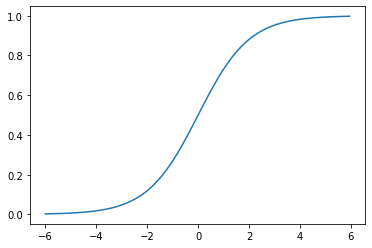

In [7]:
x=np.arange(-6,6,0.05)
plt.plot(x,sigmoid(x))
plt.show()

In [8]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [9]:

df = pd.read_excel("Social_Network_Ads.xlsx", engine='openpyxl')
print(df.head())


   Age  Salary  Purchased
0   19   19000          0
1   35   20000          0
2   26   43000          0
3   47   25000          1
4   27   57000          0


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:

X= df.iloc[:,[0,1]].values
y=df.iloc[:,-1].values
print(X.shape,y.shape)

(284, 2) (284,)


In [12]:
#Standardization
sc=StandardScaler()
X_sc=sc.fit_transform(X)
X_sc.shape

(284, 2)

In [13]:
X_sc[:5]

array([[-2.13648148, -1.50856282],
       [-0.56456246, -1.48090064],
       [-1.44876691, -0.8446705 ],
       [ 0.6143768 , -1.34258974],
       [-1.35052197, -0.45739999]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,
                 y,
                test_size = 0.2,
                random_state = 100)

In [16]:


perint(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(227, 2) (57, 2) (227,) (57,)


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[20  5]
 [ 7 25]]


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.83      0.78      0.81        32

    accuracy                           0.79        57
   macro avg       0.79      0.79      0.79        57
weighted avg       0.79      0.79      0.79        57



In [24]:
yprob=model.predict_proba(X_test)
yprob

array([[0.76103347, 0.23896653],
       [0.63926461, 0.36073539],
       [0.33602134, 0.66397866],
       [0.72173436, 0.27826564],
       [0.089451  , 0.910549  ],
       [0.1013927 , 0.8986073 ],
       [0.50162345, 0.49837655],
       [0.77000809, 0.22999191],
       [0.63718594, 0.36281406],
       [0.14411193, 0.85588807],
       [0.08496428, 0.91503572],
       [0.46928494, 0.53071506],
       [0.73990355, 0.26009645],
       [0.5820089 , 0.4179911 ],
       [0.02181458, 0.97818542],
       [0.08347938, 0.91652062],
       [0.5820089 , 0.4179911 ],
       [0.27138606, 0.72861394],
       [0.00528012, 0.99471988],
       [0.13146543, 0.86853457],
       [0.69958438, 0.30041562],
       [0.12487328, 0.87512672],
       [0.82871101, 0.17128899],
       [0.02900868, 0.97099132],
       [0.49552912, 0.50447088],
       [0.33173947, 0.66826053],
       [0.01055345, 0.98944655],
       [0.98794522, 0.01205478],
       [0.92557421, 0.07442579],
       [0.04118259, 0.95881741],
       [0.

In [25]:
#by changing thresold  we cqnchanging interpreation not the model

In [26]:
# threshold = 0.5
ans = (yprob[:, 1] > 0.3).astype(int)

In [27]:
ans

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [28]:
print(confusion_matrix(y_test, ans))

[[12 13]
 [ 1 31]]


In [29]:
print(classification_report(y_test, ans))


              precision    recall  f1-score   support

           0       0.92      0.48      0.63        25
           1       0.70      0.97      0.82        32

    accuracy                           0.75        57
   macro avg       0.81      0.72      0.72        57
weighted avg       0.80      0.75      0.73        57



In [30]:
#visualization of boundary

In [31]:
#creating mesh
age=np.arange(X_test[:,0].min()-0.2,X_test[:,0].max()+0.2,0.01)
sal=np.arange(X_test[:,1].min()-0.2,X_test[:,1].max()+0.2,0.01)

In [32]:
Age, Sal= np.meshgrid(age,sal)
print(Age.shape,Sal.shape)

(408, 424) (408, 424)


In [33]:
#model.predict([[age,sal]])
Ans=model.predict(np.c_[Age.ravel(),Sal.ravel()]).reshape(Age.shape)  #flatten and ravel same for converting 2 D to 1D
Ans.shape

(408, 424)

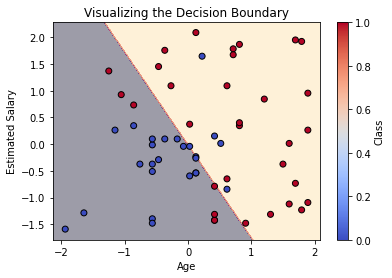

In [34]:
#contourf- fill color
#contour- only boundary
plt.contourf(Age, Sal, Ans, cmap="magma", alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm", edgecolors='k')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Visualizing the Decision Boundary")
plt.colorbar(label="Class")
plt.show()


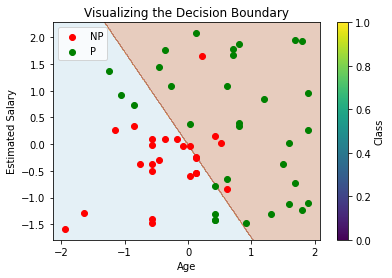

In [35]:
#contourf- fill color
#contour- only boundary
plt.contourf(Age, Sal, Ans, cmap='Paired', alpha=0.3)
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='r',label='NP')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='g',label='P')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Visualizing the Decision Boundary")
plt.colorbar(label="Class")
plt.legend()
plt.show()


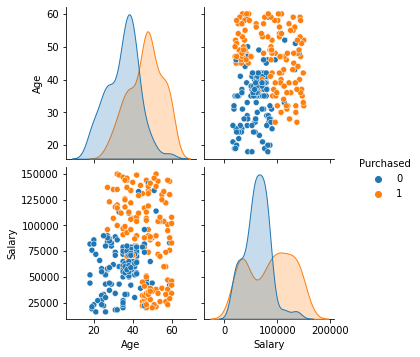

In [36]:
import seaborn as sns
sns.pairplot(df,hue="Purchased");
#prob density function --> histogram
#graph1- histogram converted into frequency age vise purchase ans salary wise purchase
#graoh2- salary- scatterplot

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
#k= square root of no. of observation
#227**0.5
model=KNeighborsClassifier(n_neighbors=15)
model.fit(X_train,y_train).score(X_test,y_test)

0.9473684210526315

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
yhat=model.predict(X_test)

In [43]:
print(confusion_matrix(y_test, yhat))

[[23  2]
 [ 1 31]]


In [44]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.94      0.97      0.95        32

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.95        57
weighted avg       0.95      0.95      0.95        57



In [54]:
age=np.arange(-3,3,0.05)#1D data
sal=np.arange(-3,3,0.05)

In [55]:
Age, Sal= np.meshgrid(age,sal)  #2D data
print(Age.shape,Sal.shape)

(120, 120) (120, 120)


In [56]:
#model.predict([[age,sal]])
Ans2=model.predict(np.c_[Age.ravel(),Sal.ravel()]).reshape(Age.shape)  #flatten and ravel same for converting 2 D to 1D
Ans2.shape

(120, 120)

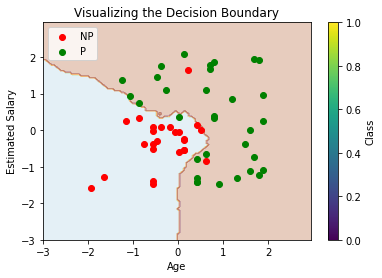

In [58]:
#using contour --- data must be in 2D
plt.contourf(Age, Sal, Ans2, cmap='Paired', alpha=0.3)
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='r',label='NP')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='g',label='P')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Visualizing the Decision Boundary")
plt.colorbar(label="Class")
plt.legend()
plt.show()

In [59]:
#can I modify the K?

In [67]:
acc=[]
for k in range(11,22):
    model=KNeighborsClassifier(n_neighbors=k)
    score=model.fit(X_train,y_train).score(X_test,y_test)
    acc.append(score)

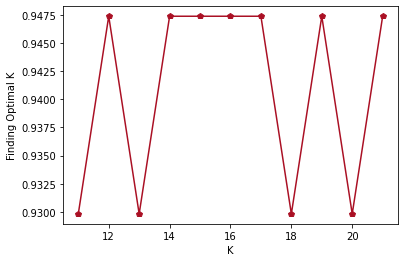

In [68]:
plt.figure(figsize)
plt.plot(range(11,22),acc,marker='p',c='#AA1024')
plt.xlabel("K")
plt.ylabel("Finding Optimal K")
plt.show()

In [71]:
model=KNeighborsClassifier(n_neighbors=15,p=3,metric='minkowski')
model.fit(X_train,y_train).score(X_test,y_test)

0.9473684210526315

In [72]:
model=KNeighborsClassifier(n_neighbors=15,p=2,metric='minkowski')
model.fit(X_train,y_train).score(X_test,y_test)

0.9473684210526315

In [74]:
model=KNeighborsClassifier(n_neighbors=15,p=1,metric='minkowski')
model.fit(X_train,y_train).score(X_test,y_test)

0.9473684210526315

In [75]:
model=KNeighborsClassifier(n_neighbors=15,p=4,metric='minkowski')
model.fit(X_train,y_train).score(X_test,y_test)

0.9298245614035088

In [76]:
model=KNeighborsClassifier(n_neighbors=15,p=5,metric='minkowski')
model.fit(X_train,y_train).score(X_test,y_test)

0.9298245614035088

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

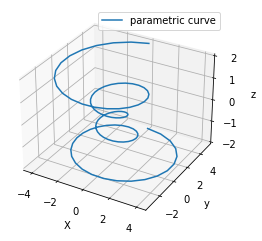

In [81]:
fig=plt.figure()
ax=fig.gca(projection="3d")
theta= np.linspace(-4*np.pi,4*np.pi,100)
z=np.linspace(-2,2,100)
r=z**2+1
X=r*np.sin(theta)
y=r*np.cos(theta)
ax.plot(X,y,z,label='parametric curve')
ax.legend()
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()